# Modeling dengan KNN Regression

#### Pengertian
**K-Nearest Neighbors (KNN) Regression** adalah metode regresi non-parametrik yang memprediksi nilai output berdasarkan kedekatan (jarak) dengan data lain dalam ruang fitur.  
Berbeda dengan model berbasis fungsi matematis, KNN tidak membuat asumsi bentuk hubungan antar variabel — melainkan menggunakan **data tetangga terdekat** untuk membuat prediksi.

In [33]:
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from sklearn.ensemble import RandomForestRegressor

In [4]:
warnings.filterwarnings('ignore')

In [5]:
def create_columns(lag=5): 
    columns = [] 
    for i in range(lag, lag - lag, -1): 
        columns.append("lag_" + str(i)) 
    columns.append("target") 
    return columns 

def fitur_column(lag=5): 
    columns = [] 
    for i in range(lag, lag - lag, -1): 
        columns.append("lag_" + str(i)) 
    return columns 

def create_supervised_data(data, lag=5): 
    data_supervised = [] 
    for i in range(lag, len(data)): 
        row = data[i-lag:i+1] 
        data_supervised.append(row) 
        columns = create_columns(lag) 
    
    supervised_df = pd.DataFrame(data_supervised, columns=columns) 
    return supervised_df

>Disini saya modeling dengan 6 dataset, data dengan lag_1 - lag_5, lag_10  
>lalu akan saya bandingkan akurasi setiap model  
>Saya normalisasi data dengan StandardScaler dari sklearn  

### Model dengan data Lag 1

In [6]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_1.csv")

X = supervised_df[fitur_column(1)]

scaler = StandardScaler()

y = supervised_df["target"]
X_train, X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

model_lag1 = KNeighborsRegressor(n_neighbors=3)
model_lag1.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_1 = model_lag1.predict(X_test_scaled)
mape_lag1 = mean_absolute_percentage_error(y_test_1, y_pred_1)
print(mape_lag1)
score_lag1 = model_lag1.score(X_test_scaled, y_test_1)
score_lag1

0.18608843298404967


0.44624625499567816

In [7]:
X_test

,lag_1
108,0.000019
67,0.000024
31,0.000024
119,0.000042
42,0.000021
12,0.000022
81,0.000028
69,0.000029
104,0.000020
109,0.000020


In [8]:
joblib.dump(scaler, 'model/scaler_lag_1.pkl')
joblib.dump(model_lag1, 'model/knn_lag_1.pkl')

['model/knn_lag_1.pkl']

### Model dengan data Lag 2

In [9]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_2.csv")

X = supervised_df[fitur_column(2)]

scaler = StandardScaler()
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test_scaled = scaler.transform(X_test)
  

model_lag2 = KNeighborsRegressor(n_neighbors=3)
model_lag2.fit(X_train, y_train)

y_pred = model_lag2.predict(X_test_scaled)
mape_lag2 = mean_absolute_percentage_error(y_test, y_pred)
print(mape_lag2)
score_lag2 = model_lag2.score(X_test_scaled, y_test)
score_lag2

0.31032123136478557


-0.23401973218077954

In [10]:
joblib.dump(scaler, 'model/scaler_lag_2.pkl')
joblib.dump(model_lag2, 'model/knn_lag_2.pkl')

['model/knn_lag_2.pkl']

### Model dengan Lag 3

In [11]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_3.csv")

X = supervised_df[fitur_column(3)]

scaler = StandardScaler()

y = supervised_df["target"]

X_train, X_test, y_train, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test_scaled = scaler.transform(X_test)

model_lag3 = KNeighborsRegressor(n_neighbors=3)
model_lag3.fit(X_train, y_train)

y_pred_3 = model_lag3.predict(X_test_scaled)
mape_lag3 = mean_absolute_percentage_error(y_test_3, y_pred_3)
print(mape_lag3)
score_lag3 = model_lag3.score(X_test_scaled, y_test_3)
score_lag3

0.17073073602851382


0.26308481145830265

In [12]:
joblib.dump(scaler, 'model/scaler_lag_3.pkl')
joblib.dump(model_lag3, 'model/knn_lag_3.pkl')

['model/knn_lag_3.pkl']

In [13]:
X_test

,lag_3,lag_2,lag_1
89,0.000031,0.000022,0.000024
105,0.000012,0.000014,0.000017
12,0.000022,0.000027,0.000019
26,0.000035,0.000033,0.000032
64,0.000020,0.000018,0.000018
67,0.000024,0.000029,0.000029
65,0.000018,0.000018,0.000024
117,0.000018,0.000028,0.000042
108,0.000019,0.000020,0.000020
73,0.000027,0.000025,0.000022


### Model dengan Lag 4

In [14]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_4.csv")

X = supervised_df[fitur_column(4)]

scaler = StandardScaler()

y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test_scaled = scaler.transform(X_test)

model_lag4 = KNeighborsRegressor(n_neighbors=3)
model_lag4.fit(X_train, y_train)

y_pred = model_lag4.predict(X_test_scaled)
mape_lag4 = mean_absolute_percentage_error(y_test, y_pred)
print(mape_lag4)
score_lag4 = model_lag4.score(X_test_scaled, y_test)
score_lag4

0.21747566241332345


0.05050057936960073

In [15]:
joblib.dump(scaler, 'model/scaler_lag_4.pkl')
joblib.dump(model_lag2, 'model/knn_lag_4.pkl')

['model/knn_lag_4.pkl']

### Model dengan Lag 5

In [16]:
print((0.000035))

3.5e-05


In [17]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_5.csv")

X = supervised_df[fitur_column(5)]

scaler = StandardScaler()

y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test_scaled = scaler.transform(X_test)

model_lag5 = KNeighborsRegressor(n_neighbors=3)
model_lag5.fit(X_train, y_train)

y_pred = model_lag5.predict(X_test_scaled)
mape_lag5 = mean_absolute_percentage_error(y_test, y_pred)
print(mape_lag5)
score_lag5 = model_lag5.score(X_test_scaled, y_test)
score_lag5

0.1755237153574441


0.193686129077966

In [18]:
joblib.dump(scaler, 'model/scaler_lag_5.pkl')
joblib.dump(model_lag2, 'model/knn_lag_5.pkl')

['model/knn_lag_5.pkl']

### Model dengan Lag 10

In [19]:
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_10.csv")

X = supervised_df[fitur_column(10)]

scaler = StandardScaler()

y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test_scaled = scaler.transform(X_test)

model_lag10 = KNeighborsRegressor(n_neighbors=3)
model_lag10.fit(X_train, y_train)

y_pred = model_lag10.predict(X_test_scaled)
mape_lag10 = mean_absolute_percentage_error(y_test, y_pred)
print(mape_lag10)
score_lag10 = model_lag10.score(X_test_scaled, y_test)
score_lag10

0.2555303000186166


-0.8575539936085821

In [44]:
rf_clf = RandomForestRegressor(random_state=42, n_estimators=300)
scaler = StandardScaler()
supervised_df = pd.read_csv("no2_bojonegoro_post/supervised_data_lag_5.csv")

X = supervised_df[fitur_column(5)]
y = supervised_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train = scaler.fit_transform(X_train)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(scaler.transform(X_test))

mean_absolute_percentage_error(y_pred, y_test)

0.16738940047558856

In [20]:
joblib.dump(scaler, 'model/scaler_lag_10.pkl')
joblib.dump(model_lag2, 'model/knn_lag_10.pkl')

['model/knn_lag_10.pkl']

## Evalusi dengan $R^2$ dan MAPE setiap model dengan lag berbeda

### Evaluasi dengan Metrik $R^2$

In [21]:
import matplotlib.pyplot as plt

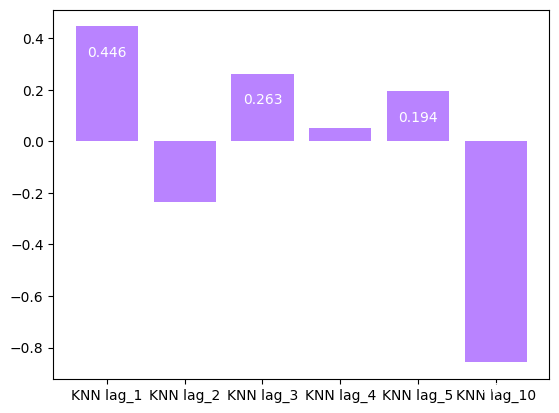

In [22]:
score = [score_lag1, score_lag2, score_lag3, score_lag4, score_lag5, score_lag10]
label = ["KNN lag_1", "KNN lag_2", "KNN lag_3", "KNN lag_4", "KNN lag_5", "KNN lag_10"]

plt.bar(label, score, color=["#b983ff"])

for i, v in enumerate(score):
    plt.text(i, v - 0.1, f"{v:.3}", va="center", ha="center", color="white", fontsize=10)
plt.show()

### Evaluasi dengan Metrik MAPE

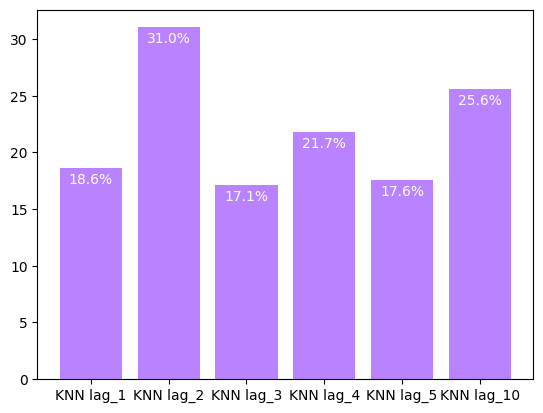

In [23]:
mape = [mape_lag1, mape_lag2, mape_lag3, mape_lag4, mape_lag5, mape_lag10]
mape = [i * 100 for i in mape]
label = ["KNN lag_1", "KNN lag_2", "KNN lag_3", "KNN lag_4", "KNN lag_5", "KNN lag_10"]

plt.bar(label, mape, color=["#b983ff"])

for i, v in enumerate(mape):
    plt.text(i, v - 1, f"{v:.3}%", va="center", ha="center", color="white", fontsize=10)
plt.show()

## GRAFIK Model Dengan LAG 1

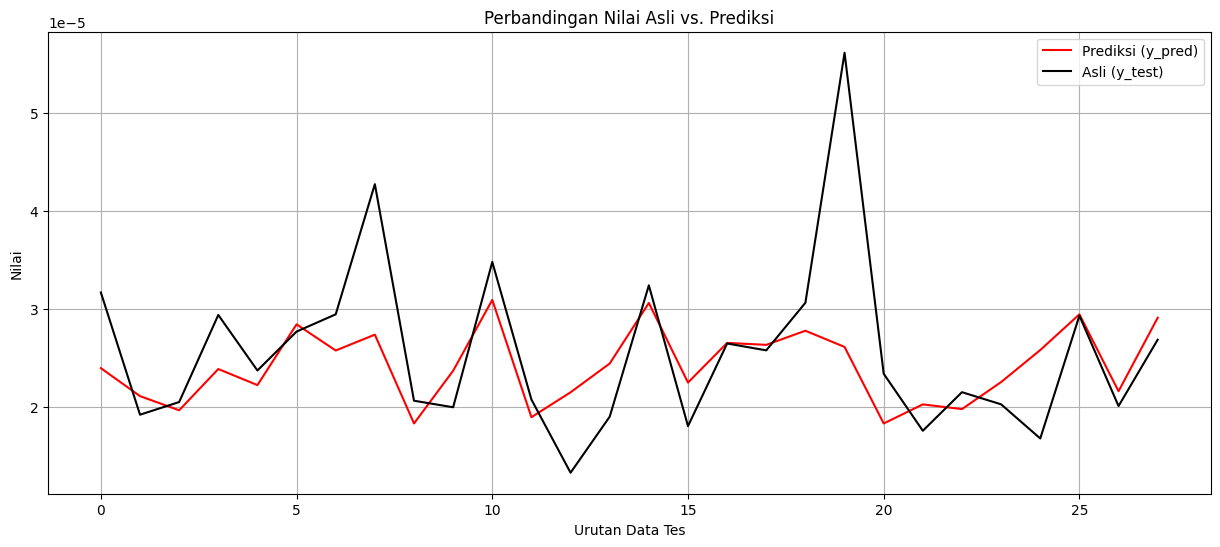

In [24]:
import matplotlib.pyplot as plt
import pandas as pd # Asumsi pd sudah di-import

# y_pred_1 adalah array, jadi ini sudah benar
lag_3_pred = pd.DataFrame(y_pred_3, columns=["pred"]) 

# PERBAIKAN: Gunakan .values untuk mengambil array NumPy-nya saja
# Ini akan membuang indeks asli dari y_test_1
# Sehingga saat jadi DataFrame, ia akan mendapat indeks baru [0, 1, 2, ...]
lag_3_test = pd.DataFrame(y_test_3.values, columns=["pred"]) 

# ------ Kode Plotting ------
plt.figure(figsize=(15, 6)) # Tambahkan ukuran agar lebih jelas

# Tambahkan 'label' untuk legenda
plt.plot(lag_3_pred.index, lag_3_pred["pred"], color="red", label="Prediksi (y_pred)")
plt.plot(lag_3_test.index, lag_3_test["pred"], color="black", label="Asli (y_test)")

plt.title("Perbandingan Nilai Asli vs. Prediksi")
plt.xlabel("Urutan Data Tes")
plt.ylabel("Nilai")
plt.legend() # Tampilkan legenda
plt.grid(True)
plt.show()

[STREAMLIT](https://23-087-no2.streamlit.app/)